<a href="https://colab.research.google.com/github/shrawan-kumar01/URassist/blob/main/old_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers  # Import layers for other keras functionalities
from tensorflow.keras.layers import Normalization as norm
from tensorflow.keras.layers import Dense , InputLayer # Import Normalization layer
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import RootMeanSquaredError

In [2]:
# shape of inpit tensor =  x = (n,number of features used to train )
# shape of output or Y  = (n,1)
data = pd.read_csv('train1.csv')
print(data.head())
data.shape

   v_id  onRoadOld  onRoadNow  years      km  rating  condition  economy  \
0     1     535651     798186      3   78945       1          2       14   
1     2     591911     861056      6  117220       5          9        9   
2     3     686990     770762      2  132538       2          8       15   
3     4     573999     722381      4  101065       4          3       11   
4     5     691388     811335      6   61559       3          9       12   

   topSpeed  hp  torque  currentPrice  
0       177  73     123      351318.0  
1       148  74      95      285001.5  
2       181  53      97      215386.0  
3       197  54     116      244295.5  
4       160  53     105      531114.5  


(1000, 12)

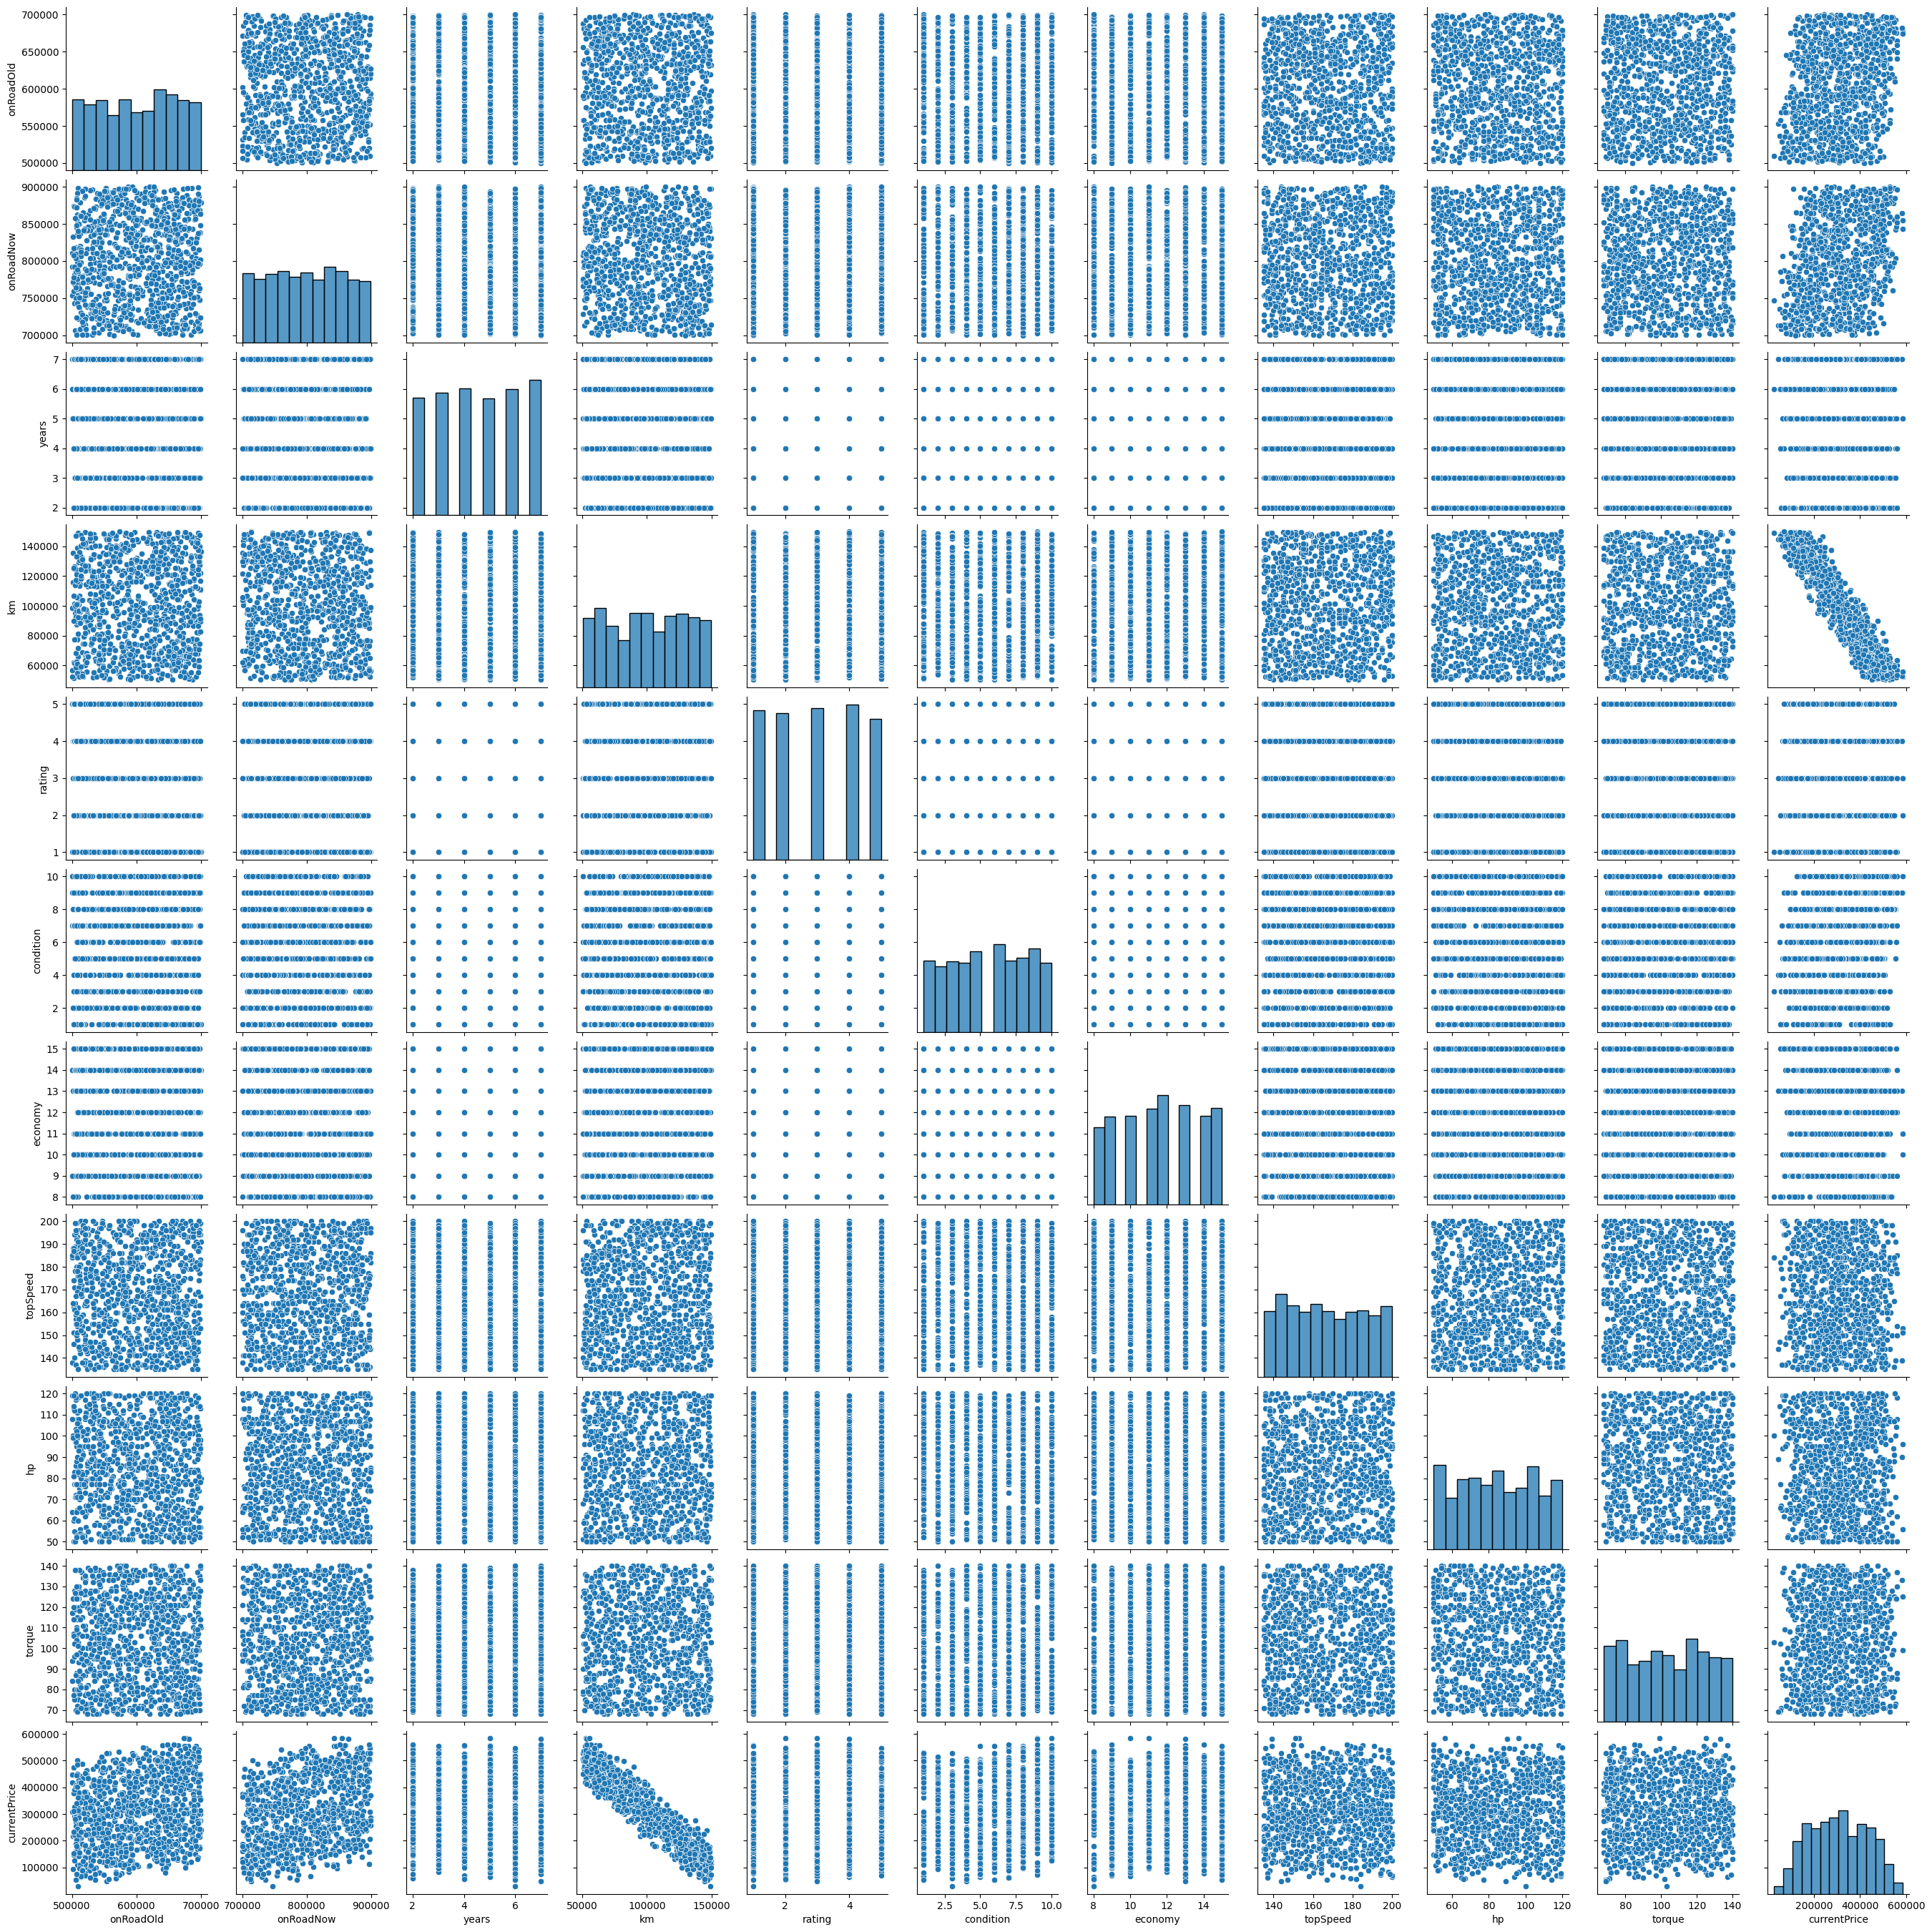

In [3]:
sns.pairplot(data[["onRoadOld","onRoadNow","years","km","rating","condition","economy","topSpeed","hp","torque","currentPrice"]])

In [4]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data,tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [5]:
tensor_data  = tf.random.shuffle(tensor_data)
print(tensor_data)


tf.Tensor(
[[5.910000e+02 5.952490e+05 8.653150e+05 ... 5.400000e+01 1.360000e+02
  5.200840e+05]
 [4.290000e+02 6.956310e+05 8.990830e+05 ... 8.300000e+01 8.500000e+01
  2.757810e+05]
 [2.580000e+02 5.009210e+05 7.922160e+05 ... 6.400000e+01 1.170000e+02
  4.463005e+05]
 ...
 [5.480000e+02 5.547780e+05 8.730330e+05 ... 7.300000e+01 1.250000e+02
  4.006065e+05]
 [9.910000e+02 5.132420e+05 8.125060e+05 ... 8.900000e+01 1.270000e+02
  4.188715e+05]
 [8.950000e+02 6.712710e+05 8.852640e+05 ... 1.010000e+02 1.140000e+02
  3.345020e+05]], shape=(1000, 12), dtype=float32)


In [6]:
x = tensor_data[:,3:-1]
print(x.shape)
print(x[:5])

(1000, 8)
tf.Tensor(
[[5.00000e+00 5.22270e+04 1.00000e+00 1.00000e+00 1.40000e+01 1.57000e+02
  5.40000e+01 1.36000e+02]
 [4.00000e+00 1.37714e+05 1.00000e+00 9.00000e+00 1.30000e+01 1.97000e+02
  8.30000e+01 8.50000e+01]
 [6.00000e+00 5.69370e+04 5.00000e+00 9.00000e+00 1.40000e+01 1.85000e+02
  6.40000e+01 1.17000e+02]
 [2.00000e+00 1.18682e+05 1.00000e+00 1.00000e+00 1.50000e+01 1.67000e+02
  8.30000e+01 9.50000e+01]
 [4.00000e+00 7.62830e+04 3.00000e+00 9.00000e+00 1.20000e+01 1.98000e+02
  7.10000e+01 7.20000e+01]], shape=(5, 8), dtype=float32)


In [7]:
y = tensor_data[:,-1]
print(y.shape)
print(y[:5])
#  change thre dimension
y = tf.expand_dims(y,axis = -1)
print(y.shape)
print(y[:5])

(1000,)
tf.Tensor([520084.  275781.  446300.5 190949.  420403. ], shape=(5,), dtype=float32)
(1000, 1)
tf.Tensor(
[[520084. ]
 [275781. ]
 [446300.5]
 [190949. ]
 [420403. ]], shape=(5, 1), dtype=float32)


In [8]:
#  normalize the x - data (x-mean)/std DEMO
# normalizer = norm()
# x_normalized = tf.constant([[3,4,5,6,7]])
# normalizer(x_normalized)

In [9]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(x)

In [10]:
#  training set
x_train = x[:int(DATASET_SIZE * TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE * TRAIN_RATIO)]
print(x_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [11]:
#  load dataset in fast way using tf.data.DAtaset()
train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True)
train_dataset = train_dataset.batch(batch_size = 32)
train_dataset = train_dataset.prefetch(buffer_size = tf.data.AUTOTUNE)

In [12]:
for x , y in train_dataset:
  print(x , "........." , y)
  break

tf.Tensor(
[[2.00000e+00 1.18682e+05 1.00000e+00 1.00000e+00 1.50000e+01 1.67000e+02
  8.30000e+01 9.50000e+01]
 [4.00000e+00 1.37714e+05 1.00000e+00 9.00000e+00 1.30000e+01 1.97000e+02
  8.30000e+01 8.50000e+01]
 [6.00000e+00 1.36584e+05 1.00000e+00 8.00000e+00 1.10000e+01 1.82000e+02
  1.08000e+02 7.90000e+01]
 [4.00000e+00 7.62830e+04 3.00000e+00 9.00000e+00 1.20000e+01 1.98000e+02
  7.10000e+01 7.20000e+01]
 [2.00000e+00 1.03983e+05 3.00000e+00 5.00000e+00 1.30000e+01 1.59000e+02
  7.20000e+01 1.02000e+02]
 [4.00000e+00 1.00003e+05 1.00000e+00 6.00000e+00 1.40000e+01 1.51000e+02
  9.00000e+01 1.32000e+02]
 [5.00000e+00 7.04530e+04 4.00000e+00 7.00000e+00 1.20000e+01 1.70000e+02
  1.15000e+02 1.34000e+02]
 [2.00000e+00 6.83910e+04 2.00000e+00 6.00000e+00 9.00000e+00 1.46000e+02
  7.00000e+01 1.16000e+02]
 [3.00000e+00 6.50370e+04 1.00000e+00 1.00000e+00 8.00000e+00 1.84000e+02
  1.08000e+02 6.90000e+01]
 [6.00000e+00 1.33211e+05 3.00000e+00 4.00000e+00 1.50000e+01 1.55000e+02
  6.40

In [13]:
# valadating set
x_val = x[int(DATASET_SIZE * TRAIN_RATIO):int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO))]
y_val = y[int(DATASET_SIZE * TRAIN_RATIO):int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO))]
print(x_val.shape)
print(y_val.shape)

(0, 8)
(0, 1)


In [14]:
#  load dataset in fast way using tf.data.DAtaset()
val_dataset = tf.data.Dataset.from_tensor_slices((x_val,y_val))
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True)
val_dataset = val_dataset.batch(batch_size = 32)
val_dataset = val_dataset.prefetch(buffer_size = tf.data.AUTOTUNE)

In [15]:
x_test = x[int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO)):]
y_test = y[int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO)):]
print(x_test.shape)
print(y_test.shape)

(0, 8)
(0, 1)


In [16]:
#  load dataset in fast way using tf.data.DAtaset()
test_dataset = tf.data.Dataset.from_tensor_slices((x_test,y_test))
test_dataset =test_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True)
test_dataset = test_dataset.batch(batch_size = 32)
test_dataset = test_dataset.prefetch(buffer_size = tf.data.AUTOTUNE)

In [17]:
#  X NORMALIZATION
normalizer = norm()
normalizer.adapt(x_train)
normalizer(x)[:5]
# print(normalizer(x).shape)

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-1.4626436 ,  0.6413428 , -1.3705577 , -1.6220034 ,  1.5162367 ,
         0.01978724, -0.05721212, -0.40897444],
       [-0.29719064,  1.2984079 , -1.3705577 ,  1.192753  ,  0.61034465,
         1.5667    , -0.05721212, -0.8836982 ],
       [ 0.8682623 ,  1.2593956 , -1.3705577 ,  0.8409084 , -0.29554734,
         0.7932436 ,  1.1561954 , -1.1685325 ],
       [-0.29719064, -0.8224499 ,  0.04603945,  1.192753  ,  0.15739867,
         1.6182637 , -0.6396477 , -1.5008392 ],
       [-1.4626436 ,  0.1338712 ,  0.04603945, -0.21462522,  0.61034465,
        -0.39272282, -0.5911114 , -0.07666779]], dtype=float32)>

In [18]:
x[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[2.00000e+00, 1.18682e+05, 1.00000e+00, 1.00000e+00, 1.50000e+01,
        1.67000e+02, 8.30000e+01, 9.50000e+01],
       [4.00000e+00, 1.37714e+05, 1.00000e+00, 9.00000e+00, 1.30000e+01,
        1.97000e+02, 8.30000e+01, 8.50000e+01],
       [6.00000e+00, 1.36584e+05, 1.00000e+00, 8.00000e+00, 1.10000e+01,
        1.82000e+02, 1.08000e+02, 7.90000e+01],
       [4.00000e+00, 7.62830e+04, 3.00000e+00, 9.00000e+00, 1.20000e+01,
        1.98000e+02, 7.10000e+01, 7.20000e+01],
       [2.00000e+00, 1.03983e+05, 3.00000e+00, 5.00000e+00, 1.30000e+01,
        1.59000e+02, 7.20000e+01, 1.02000e+02]], dtype=float32)>

In [19]:
#  creating a model tf
model = tf.keras.Sequential(
   [
    InputLayer(input_shape = (8,)),
    normalizer,
    Dense(128, activation="relu"),
    Dense(128 , activation="relu"),
    Dense(128 , activation="relu"),
    Dense(1)
   ]
)
model.summary()
model.build()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

In [20]:
#  creating the same model
# model = tf.keras.Sequential()
# model.add(normalizer)
# model.add(Dense(1))
# model.summary()
# model.build()


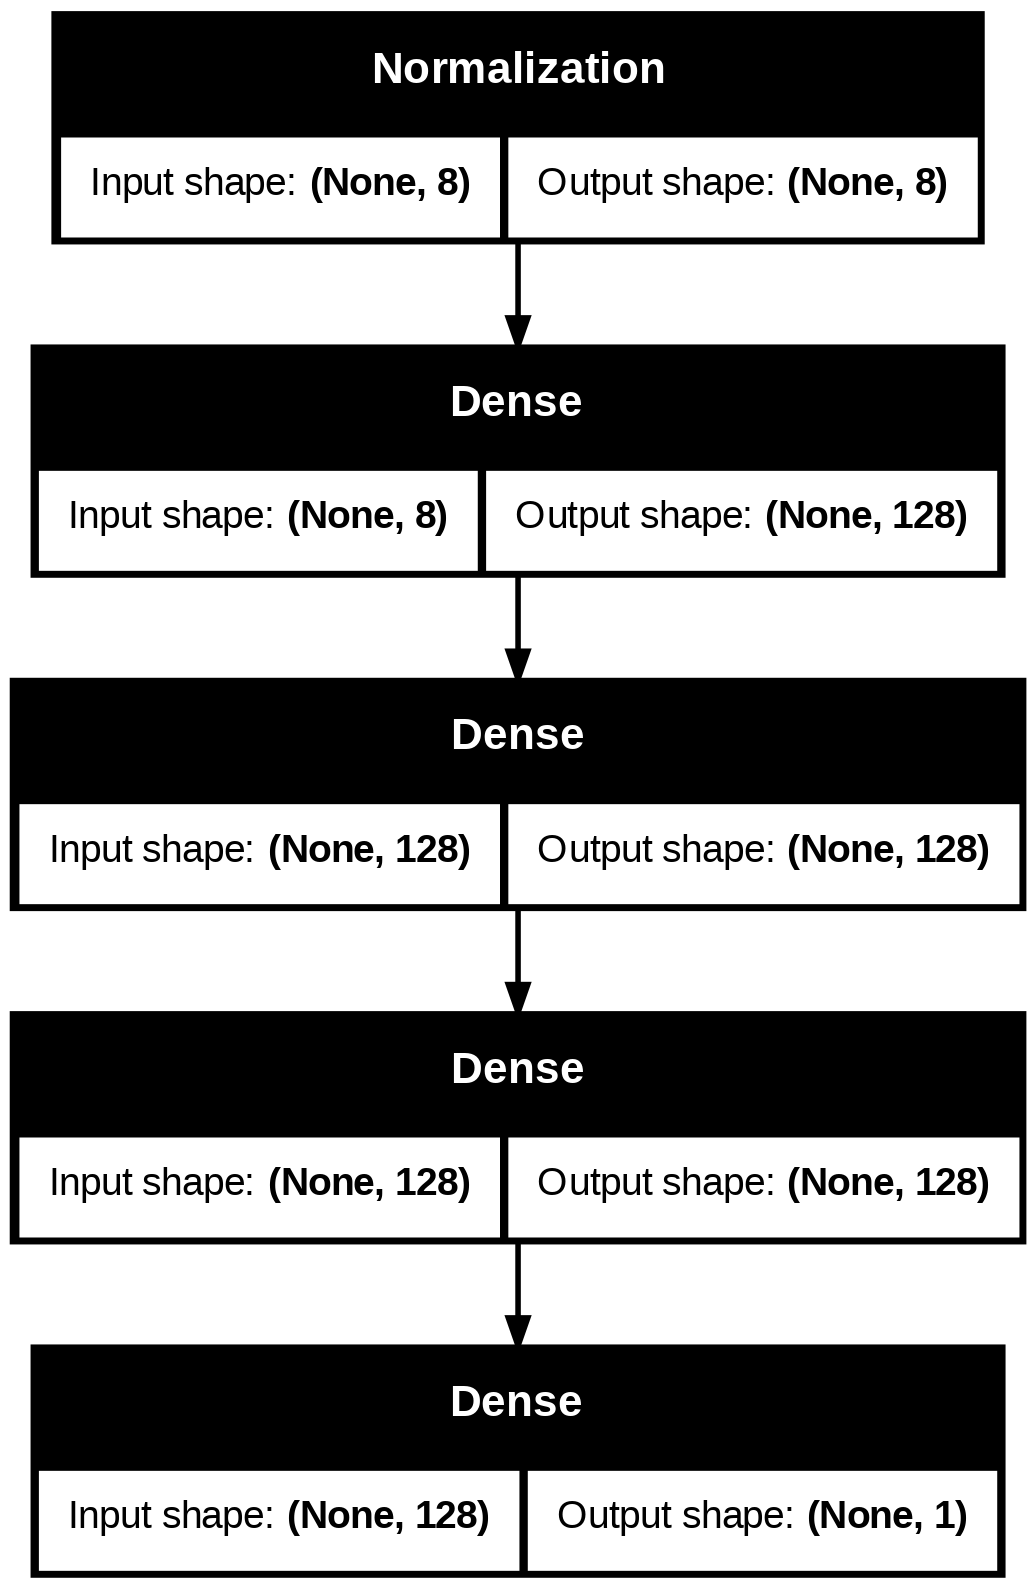

In [21]:
#  plot model
tf.keras.utils.plot_model(model , to_file = "model.png", show_shapes = True)

In [22]:
# computing errors
# model.compile(loss = MeanAbsoluteError())


In [23]:
# optimizer
model.compile(loss = "MeanAbsoluteError",
              optimizer = Adam(learning_rate=1.0),
              metrics = [RootMeanSquaredError()]
              )


In [24]:
histry = model.fit(train_dataset,epochs=100,verbose = 1,validation_data = val_dataset)

Epoch 1/100
17/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 312142.8438 - root_mean_squared_error: 338387.8438

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


AttributeError: 'NoneType' object has no attribute 'items'

In [ ]:
# model.fit(x,y,epochs=100,verbose = 1)
histry.history

In [ ]:
#  plotting the loses
plt.plot(histry.history['loss'])
plt.plot(histry.history['val_loss'])
plt.plot(histry.history['root_mean_squared_error'])
plt.plot(histry.history['val_root_mean_squared_error'])
plt.title("model-loses")
plt.ylabel("loses")
plt.xlabel("epochs")


#
plt.plot(histry.history['root_mean_squared_error'])
plt.title("model-performance")
plt.ylabel("rmse")
plt.xlabel("epochs")
plt.legend(['train','val_loss'])
plt.show()

In [ ]:
histry.history


In [ ]:
model.evaluate(x_val,y_val)
model.evaluate(x_test,y_test)

In [ ]:
model.predict(tf.expand_dims((x_test[0]), axis = 0 ))

In [ ]:
y_test[0]

In [ ]:
#  plot
y_actual = list(y_test[:,0].numpy())
y_pred = list(model.predict(x_test)[:,0])

ind = np.arange(100)
print(ind)
plt.figure(figsize = (40,20))
width = 0.1
plt.bar(ind , y_actual,label = "predict car price" , width = width)
plt.bar(ind + width, y_pred,label = "true car price" , width = width)
# pltActual vs predicated prices')
# plt.ylabel = ('Ca.clabel(r''))
